In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt

In [2]:

def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3', 'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'IK')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.mot'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(10), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.mot', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        #print(joint_data_filtered)
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
joint_data_within_intervals = extract_data_within_intervals(base_path, 'posterior_1')
joint_data_high = extract_data_within_intervals(base_path, 'posterior_3')

In [3]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [4]:
average_joint = stack_joint_data(joint_data_within_intervals)
average_joint_high = stack_joint_data(joint_data_high)

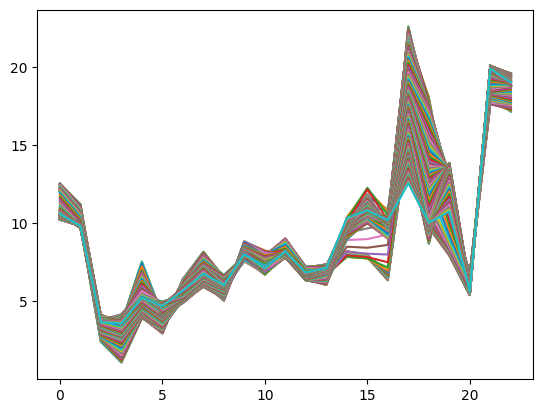

In [5]:
hip_flexion_l_new = average_joint['hip_flexion_l']
hip_flexion_r_new = average_joint['hip_flexion_r']
ankle_angle_l_new = average_joint['ankle_angle_l']
ankle_angle_r_new = average_joint['ankle_angle_r']

hip_flexion_l_new_high = average_joint_high['hip_flexion_l']
hip_flexion_r_new_high = average_joint_high['hip_flexion_r']

ankle_angle_l_new_high = average_joint_high['ankle_angle_l']
ankle_angle_r_new_high = average_joint_high['ankle_angle_r']

knee_angle_l_new = -average_joint['knee_angle_l']
knee_angle_r_new = -average_joint['knee_angle_r']

plt.plot(knee_angle_l_new)
plt.show()

In [6]:
def extract_data_within_intervals(base_path, level):
    participants = ['pp1', 'pp3',  'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_joint_data = []
    key = level

    for participant in participants:
        joint_path = os.path.join(base_path, participant, 'ID')
        pertinfo_path = os.path.join(base_path, participant, 'pertinfo')
        
        # Process joint data files and pertinfo files
        for mot_file in os.listdir(joint_path):
            if key in mot_file and mot_file.endswith('.sto'):
                joint_full_path = os.path.join(joint_path, mot_file)
                
                # Read the .mot file, setting skiprows to skip header lines correctly
                # Line 12 (index 11) contains the headers for columns
                joint_data = pd.read_csv(joint_full_path, delimiter='\t', skiprows=range(6), header=0)
                
                # Corresponding pertinfo file
                pertinfo_file = mot_file.replace('joint', 'pertinfo').replace('.sto', '.mat')  # Adjust naming convention if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0] * 100), int(time_intervals[1] * 100)
                    duration = 200
                    
                    # Check if start_time and duration does not exceed number of rows
                    if start_time + duration <= len(joint_data):
                        joint_data_filtered = joint_data.iloc[start_time:start_time + duration]
                        
                        # Create a dictionary with each joint's data
                        joint_data_dict = {col: joint_data_filtered[col].values.tolist() for col in joint_data_filtered.columns}
                        #print(joint_data_filtered.columns)

                        all_joint_data.append({
                            'participant': participant,
                            'file': mot_file,
                            'interval': (start_time, end_time),
                            'data': joint_data_dict
                        })
                        #print(joint_data_dict)

    return all_joint_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
torque_data_within_intervals = extract_data_within_intervals(base_path, 'posterior_1')
torque_data_high = extract_data_within_intervals(base_path, 'posterior_3')

In [7]:
def stack_joint_data(all_joint_data):
    # Dictionary to store the 2D arrays for each joint
    joint_data_stacked = {}

    # Collect data for each joint across all participants
    for data in all_joint_data:
        for joint, values in data['data'].items():
            if joint not in joint_data_stacked:
                joint_data_stacked[joint] = []
            joint_data_stacked[joint].append(values)  # Append the whole array for the participant

    # Convert lists of arrays into 2D numpy arrays
    for joint in joint_data_stacked:
        try:
            # Stack the list of arrays vertically (each row is one participant's data)
            joint_data_stacked[joint] = np.vstack(joint_data_stacked[joint])
        except ValueError:
            print(f"Error: Data arrays for {joint} have mismatched lengths and cannot be stacked.")

    return joint_data_stacked

In [8]:
average_torque = stack_joint_data(torque_data_within_intervals)
average_torque_high = stack_joint_data(torque_data_high)

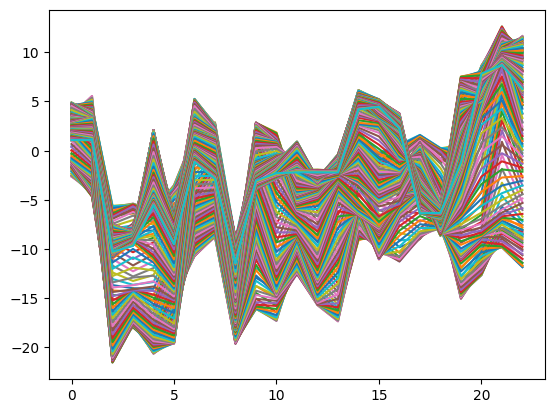

In [9]:
hip_flexion_l_m_new = average_torque['hip_flexion_l_moment']
hip_flexion_r_m_new = average_torque['hip_flexion_r_moment']
ankle_angle_l_m_new = average_torque['ankle_angle_l_moment']
ankle_angle_r_m_new = average_torque['ankle_angle_r_moment']

hip_flexion_l_m_high = average_torque_high['hip_flexion_l_moment']
hip_flexion_r_m_high = average_torque_high['hip_flexion_r_moment']
ankle_angle_l_m_high = average_torque_high['ankle_angle_l_moment']
ankle_angle_r_m_high = average_torque_high['ankle_angle_r_moment']

knee_angle_l_m_new = average_torque['knee_angle_l_moment']
knee_angle_r_m_new = average_torque['knee_angle_r_moment']

plt.plot(knee_angle_r_m_new)
plt.show()

In [10]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_01_22_22_53_000SAC_pos'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]
bins_high = [20, 22, 24, 26, 28, 30]

In [11]:
AP_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
print(len(stand))
mass = 150

84


In [12]:
for data in stand:
    AP_pert.append(data)
    #data['jointInfo']['qacc'] = np.array(data['jointInfo']['qacc'])
    p_t = int(data['modelInfo']['perturbationTime']*100)
    acc = max(abs(arr[0]) for arr in data['jointInfo']['qacc']['slide_joint'][p_t: p_t + 20])
    print(acc)
    if bins[0] <= acc <= bins[1]:
        pert_1_AP.append(data)
    elif bins[1] <= acc <= bins[2]:
        pert_2_AP.append(data)
    elif bins[2] <= acc <= bins[3]:
        pert_3_AP.append(data)
    elif bins[3] <= acc <= bins[4]:
        pert_4_AP.append(data)
    elif bins[4] <= acc <= bins[5]:
        pert_5_AP.append(data)     
    elif bins_high[0] <= acc <= bins_high[1]:
        pert_1_AP_high.append(data)
    elif bins_high[1] <= acc <= bins_high[2]:
        pert_2_AP_high.append(data)
    elif bins_high[2] <= acc <= bins_high[3]:
        pert_3_AP_high.append(data)
    elif bins_high[3] <= acc <= bins_high[4]:
        pert_4_AP_high.append(data)
    elif bins_high[4] <= acc <= bins_high[5]:
        pert_5_AP_high.append(data)       

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]
pert_AP_high = [pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high]
print(len(pert_5_AP))


joint_names_l = ['ankle_angle_l',  'hip_flexion_l'] #'hip_adduction_l', 'hip_rotation_l',
title = ['Ankle',  'Hip Flexion'] #'Hip Adduction', 'Hip Rotation', 
joint_names_r = ['ankle_angle_r', 'hip_flexion_r'] #'hip_adduction_r','hip_rotation_r',

8.486442065236103
6.754816033213385
3.0994127414781127
9.057477509853182
7.8881271356208345
6.974259472557954
3.2199055035259176
1.573158668393592
3.8173476026915294
4.301818788330561
5.279695455981589
6.7218499433782295
2.1206217648592847
5.584183093183424
4.5737228408164325
5.636388895669713
4.313637197463539
5.754323209426141
8.818774299654812
1.7983326970176037
6.3952733802555075
2.3591366542805945
2.9738298220493693
7.142788496988838
1.2744770344818253
4.575268401420102
7.442175882405433
6.648389594671828
2.583156629325436
7.517062566813372
6.703896453377016
8.157611533773037
2.0216110958653197
1.201773976141996
7.222803624706673
8.822720178836475
1.6539121321476584
3.6872902742904747
3.2751181343144378
7.958146937134538
7.62347517521221
4.372081742751973
1.4584136000874348
7.640488618934689
2.1424505294760507
6.3269635887729
7.057563316291202
3.315578591326384
1.5271467119872313
8.624121816712655
23.266667190312663
25.55760192230529
22.37212849136735
26.493658162490046
21.9826897

In [13]:
joint_names_l_high = ['ankle_angle_l', 'hip_flexion_l']
title_high = ['Ankle_high', 'Hip Flexion']
joint_names_r_high = ['ankle_angle_r', 'hip_flexion_r']

In [14]:
time_mo  = np.linspace(0, 2, 200)

200


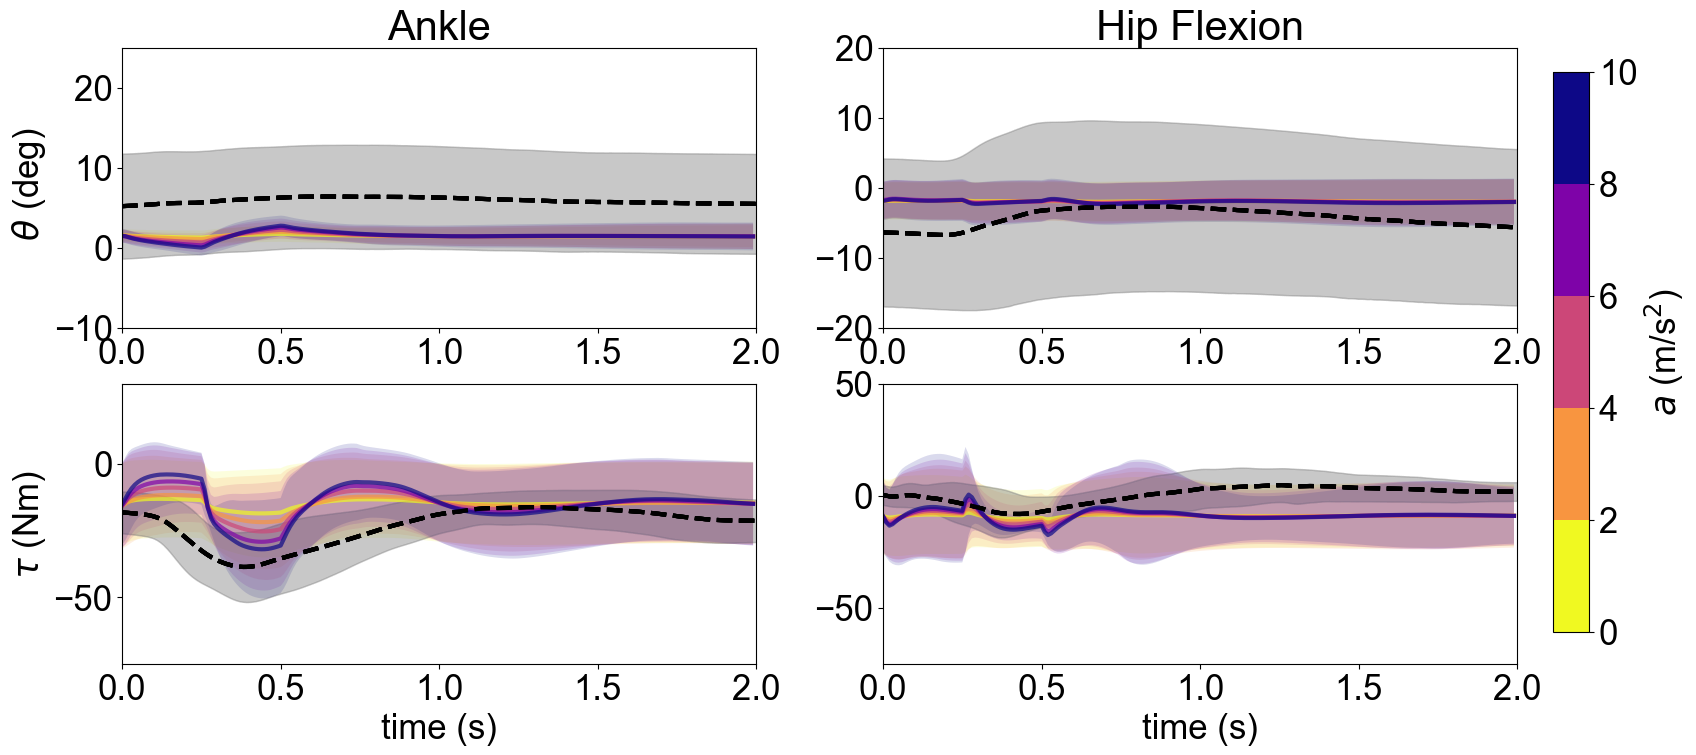

In [15]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))

colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins, colormap.N)
fig, ax = plt.subplots(2, 2, figsize=(18, 8))

for i in range(0, 2):
    plt.subplot(2, 2, i+1)
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flexion_new = np.concatenate((hip_flexion_l_new, hip_flexion_r_new), axis = 0)
                mean_e = np.mean(hip_flexion_new, axis = 0)
                std_e = np.std(hip_flexion_new, axis = 0)
            elif i == 0:
                # Assuming ankle_angle_l_new and ankle_angle_r_new are both 2D arrays with the same number of columns
                ankle_angle_new = np.concatenate((ankle_angle_l_new, ankle_angle_r_new), axis=0)
                mean_e = np.mean(ankle_angle_new, axis = 0)
                std_e = np.std(ankle_angle_new, axis = 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    plt.title(title[i])
    if i == 0:
        plt.ylabel(r' $\theta$ (deg)')



for i in range(0, 2):
    plt.subplot(2, 2, i+3)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flexion_m_new = np.concatenate((hip_flexion_l_m_new, hip_flexion_r_m_new), axis = 0)
                mean_e = np.mean(hip_flexion_m_new, axis = 0)
                std_e = np.std(hip_flexion_m_new, axis = 0)
            elif i == 0:
                ankle_angle_m_new = np.concatenate((ankle_angle_l_m_new, ankle_angle_r_m_new), axis = 0)
                mean_e = np.mean(ankle_angle_m_new, axis = 0)
                std_e = np.std(ankle_angle_m_new, axis = 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')


sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 10, 6), cax=cbar_ax) 
cbar.set_label(r'$a$ (m/s$^2$)')

ax[0, 0].set_ylim(-10, 25)
ax[1, 0].set_ylim(-75, 30)
ax[0, 1].set_ylim(-20, 20)
ax[1, 1].set_ylim(-75, 50)

#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
#fig.suptitle('Ankle Strategy', fontsize=40) 
plt.setp(ax, xlim=[0, time_len/100])
plt.show()
plt.close()

200


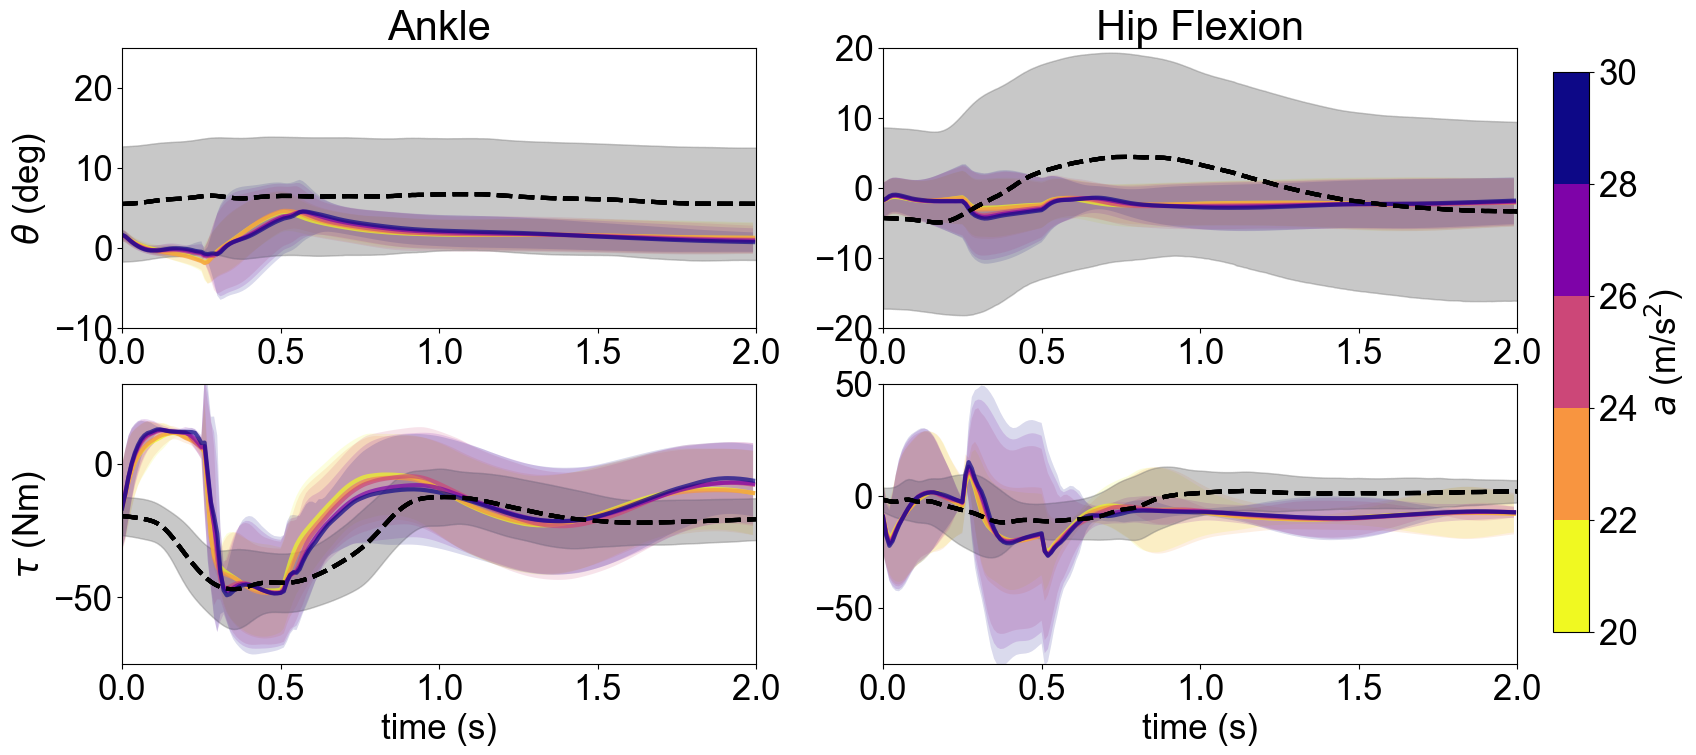

In [16]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Arial",  # specify font family here
    "font.size":25}) 

y_range_joint = [-50, 50]
time_len = 200
x_time = np.arange(0, time_len/100, 0.01)
print(len(x_time))

colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins_high, colormap.N)
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
for i in range(0, 2):
    plt.subplot(2, 2, i+1)
    for j in range(len(pert_AP_high)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100)
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qpos'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qpos'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flex_high = np.concatenate((hip_flexion_l_new_high, hip_flexion_r_new_high), axis= 0)
                mean_e = np.mean(hip_flex_high, axis = 0)
                std_e = np.std(hip_flex_high, axis = 0)
            elif i == 0:
                ankle_angle_high = np.concatenate((ankle_angle_l_new_high, ankle_angle_r_new_high), axis= 0)
                mean_e = np.mean(ankle_angle_high, axis = 0)
                std_e = np.std(ankle_angle_high, axis = 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
    plt.title(title[i])
    if i == 0:
        plt.ylabel(r'$\theta$ (deg)')



for i in range(0, 2):
    plt.subplot(2, 2, i+3)
    for j in range(len(pert_AP_high)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP_high[j]:
            p_t = int(k['modelInfo']['perturbationTime']*100) 
            #if fatigue:
                #p_t += 2200
            l[j].append(k['jointInfo']['qtau'][joint_names_l_high[i]][p_t:p_t+time_len])
            l[j].append(k['jointInfo']['qtau'][joint_names_r_high[i]][p_t:p_t+time_len])
            mean_pert.append(max(abs(arr[0]) for arr in k['jointInfo']['qacc']['slide_joint'][p_t: p_t+20]))
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 3)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.15)
            if i == 1:
                hip_flex_m_high = np.concatenate((hip_flexion_l_m_high, hip_flexion_r_m_high), axis= 0)
                mean_e = np.mean(hip_flex_m_high, axis = 0)
                std_e = np.std(hip_flex_m_high, axis = 0)
            elif i == 0:
                ankle_angle_m_high = np.concatenate((ankle_angle_l_m_high, ankle_angle_r_m_high), axis= 0)
                mean_e = np.mean(ankle_angle_m_high, axis = 0)
                std_e = np.std(ankle_angle_m_high, axis = 0)
            plt.plot(time_mo, mean_e, linewidth = 3, color = 'black', linestyle = 'dashed')
            plt.fill_between(time_mo, mean_e-std_e, mean_e+std_e, color = 'grey', alpha = 0.1)
            plt.xlabel('time (s)')
    if i == 0:
        plt.ylabel(r'$\tau$ (Nm)')


sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(20, 30, 6), cax=cbar_ax) 
cbar.set_label(r'$a$ (m/s$^2$)')

ax[0, 0].set_ylim(-10, 25)
ax[1, 0].set_ylim(-75, 30)
ax[0, 1].set_ylim(-20, 20)
ax[1, 1].set_ylim(-75, 50)


#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
plt.setp(ax, xlim=[0, time_len/100])
#fig.suptitle('Hip Strategy', fontsize=40) 
plt.show()
plt.close()